<a href="https://colab.research.google.com/github/LohitSubodh/AI-Tool-for-Landmine-detection-using-Gpr/blob/main/Capstone_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
from time import time
import pickle
from keras.models import Model, load_model
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Cpaston_Project/2020_08_21/gprMax/

/content/drive/.shortcut-targets-by-id/1xAAKRBNZ9m-dmyYDubl-gdVqQHhJ6OWL/Cpaston_Project/2020_08_21/gprMax


In [ ]:
! pip install colorama
! pip install terminaltables
import os
os.getcwd()

  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=2fe5d1ac6afc3bd8617bcbed033e244ef3538559cdc13499754cc8ccc3d883ef
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables


'/content/drive/.shortcut-targets-by-id/1xAAKRBNZ9m-dmyYDubl-gdVqQHhJ6OWL/Cpaston_Project/2020_08_21/gprMax'

In [ ]:
arrays=[]
from tools.plot_Bscan import get_output_data, mpl_plot
path='/content/drive/My Drive/Cpaston_Project/2020_08_21/gprMax/project'
#/content/drive/My Drive/Cpaston_Project/2020_08_21/gprMax/project/Output_files/no_mine1_merged.out
#filename='project/Output_files/no_mine1_merged.out'
for i in range(151,201):
  filename = os.path.join( path,'Output_files','mine','mine'+str(i)+'_merged.out')
  rxnumber = 1
  rxcomponent = 'Ey'
  outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
  outputdata=outputdata.reshape(1300,60)
  arrays.append(outputdata)
   
#print(outputdata.shape)
#plt = mpl_plot(filename,outputdata, dt, rxnumber, rxcomponent)
#print(outputdata.shape)

# Change from the default 'seismic' colormap
#plt.set_cmap('gray')

In [ ]:
y = []
for i in range(151,201):
  filename = os.path.join( path,'Output_files','Varying depth','vmine'+str(i)+'_merged.out')
  rxnumber = 1
  rxcomponent = 'Ey'
  outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
  outputdata=outputdata.reshape(1300,60)
  y.append(outputdata)

In [ ]:
X=np.stack(arrays)
print(X.shape)
y = np.array(y)
Y = np.stack(y)
print(Y.shape)

(50, 1300, 60)
(50, 1300, 60)


In [ ]:
X += abs(np.min(X))
X /= np.max(X)

Y += abs(np.min(Y))
Y /= np.max(Y)

In [ ]:
from keras.layers import *

In [ ]:
input_img = Input(shape = (1300,60))
layer1 = Flatten()(input_img)
layer2 = Dense(32, activation = 'relu')(layer1)
encoder = Model(input_img , layer2)

input_encoded = Input(shape = (32, ))
layer3 = Dense(1300*60, activation = 'sigmoid')(input_encoded)
output_img = Reshape((1300,60))(layer3)
decoder = Model(input_encoded, output_img)

enco_input = Input(shape = (1300,60))
enco_output = encoder(enco_input)
deco_output = decoder(enco_output)

model = Model(inputs = [enco_input], outputs = [deco_output])
print(model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1300, 60)]        0         
_________________________________________________________________
model_3 (Functional)         (None, 32)                2496032   
_________________________________________________________________
model_4 (Functional)         (None, 1300, 60)          2574000   
Total params: 5,070,032
Trainable params: 5,070,032
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print(X.shape)
print(Y.shape)

(50, 1300, 60)
(50, 1300, 60)


In [ ]:
Adam = keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer = Adam, loss = "binary_crossentropy")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(40, 1300, 60)
(40, 1300, 60)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint 
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta = 0.001)

hist = model.fit(x = X_train, y = Y_train, batch_size = 32, epochs = 250, verbose = 1, validation_data = (X_test, Y_test), shuffle = True, callbacks = [early_stop])

Epoch 1/250
2/2 [==============================] - 0s 159ms/step - loss: 0.7876 - val_loss: 0.6901
Epoch 2/250
2/2 [==============================] - 0s 46ms/step - loss: 0.6900 - val_loss: 0.6871
Epoch 3/250
2/2 [==============================] - 0s 41ms/step - loss: 0.6868 - val_loss: 0.6830
Epoch 4/250
2/2 [==============================] - 0s 50ms/step - loss: 0.6827 - val_loss: 0.6785
Epoch 5/250
2/2 [==============================] - 0s 44ms/step - loss: 0.6782 - val_loss: 0.6740
Epoch 6/250
2/2 [==============================] - 0s 44ms/step - loss: 0.6737 - val_loss: 0.6696
Epoch 7/250
2/2 [==============================] - 0s 43ms/step - loss: 0.6694 - val_loss: 0.6655
Epoch 8/250
2/2 [==============================] - 0s 46ms/step - loss: 0.6653 - val_loss: 0.6618
Epoch 9/250
2/2 [==============================] - 0s 48ms/step - loss: 0.6616 - val_loss: 0.6585
Epoch 10/250
2/2 [==============================] - 0s 50ms/step - loss: 0.6584 - val_loss: 0.6556
Epoch 11/250
2/2 [

In [ ]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

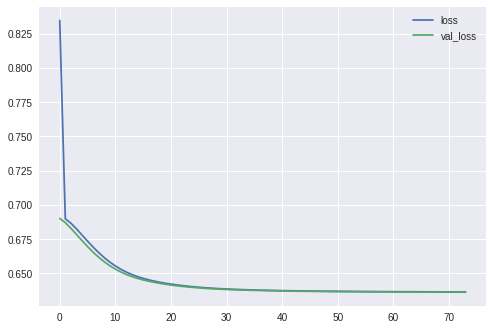

In [ ]:
plt.plot(hist.history['loss'], label = "loss")
plt.plot(hist.history['val_loss'], label = "val_loss")
plt.style.use('seaborn')
plt.legend()
plt.show()

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)

(10, 1300, 60)


Mine

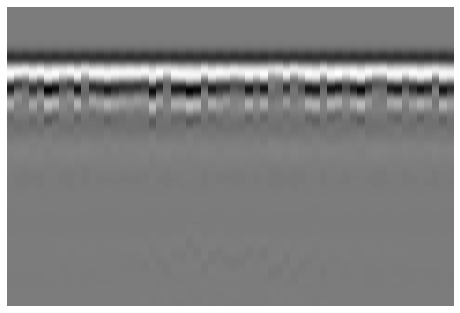

In [ ]:
plt.imshow(X_test[0], interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

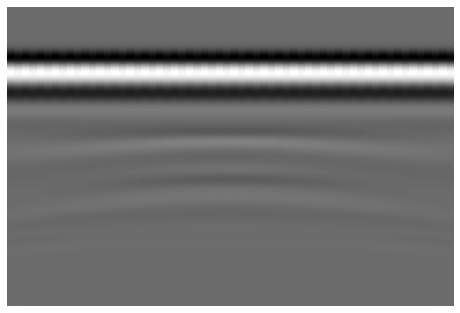

In [ ]:
plt.imshow(Y_test[0], interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

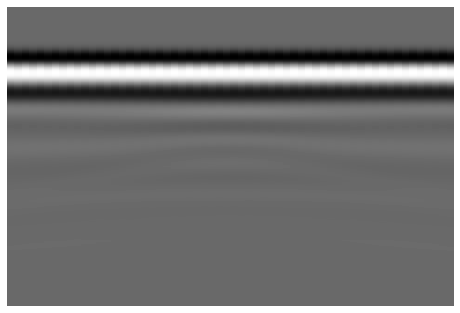

In [ ]:
plt.imshow(Y_pred[0], interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

No Mine

In [ ]:
for i in range(1,2):
  filename = os.path.join( path,'Output_files','without_mine','nomine'+str(i)+'_merged.out')
  rxnumber = 1
  rxcomponent = 'Ey'
  outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
  outputdata=outputdata.reshape(1300,60)

In [ ]:
print(outputdata.shape)
X_no_mine = outputdata
print(X_no_mine.shape)

(1300, 60)
(1300, 60)


In [ ]:
Y_pred_no_mine = model.predict(X_no_mine.reshape(1,1300,60))[0]
print(Y_pred_no_mine.shape)

(1300, 60)


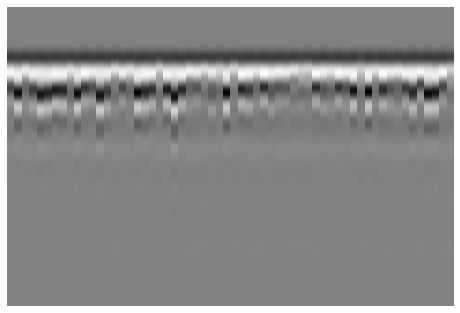

In [ ]:
plt.imshow(X_no_mine, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

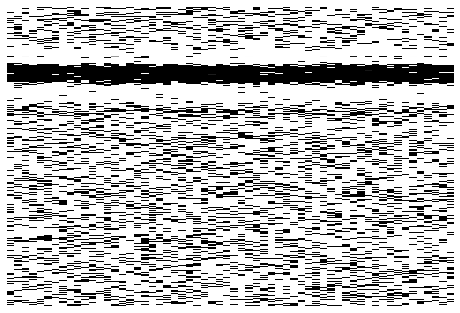

In [ ]:
plt.imshow(Y_pred_no_mine, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)

(10, 1300, 60)


Rock

In [ ]:
filename = os.path.join( path,'Output_files','mine','rock1'+'_merged.out')
rxnumber = 1
rxcomponent = 'Ey'
outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
outputdata=outputdata.reshape(1300,60)

In [ ]:
X_rock = outputdata
print(X_rock.shape)

(1300, 60)


In [ ]:
Y_pred_rock = model.predict(X_rock.reshape(1,1300,60))[0]
print(Y_pred_rock.shape)

(1300, 60)


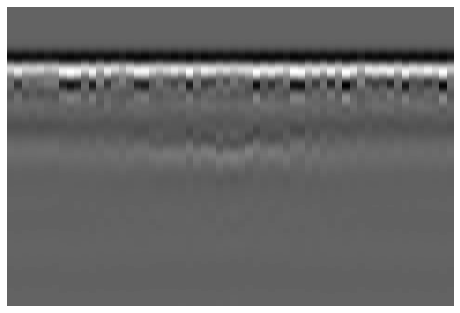

In [ ]:
plt.imshow(X_rock, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

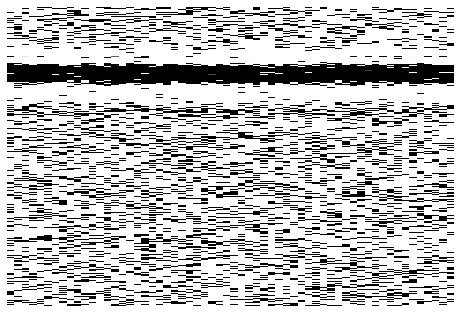

In [ ]:
plt.imshow(Y_pred_rock, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

Metallic Cylinder

In [ ]:
filename = os.path.join( path, 'Output_files','without_mine','pec_merged.out')
rxnumber = 1
rxcomponent = 'Ey'
outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)

In [ ]:
X_met_cy = outputdata
print(X_met_cy.shape)

(1300, 60)


In [ ]:
Y_pred_met_cy = model.predict(X_met_cy.reshape(1,1300,60))[0]
print(Y_pred_met_cy.shape)

(1300, 60)


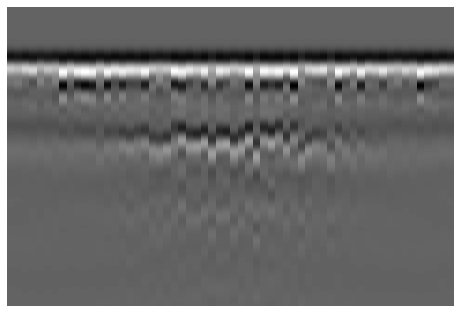

In [ ]:
plt.imshow(X_met_cy, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

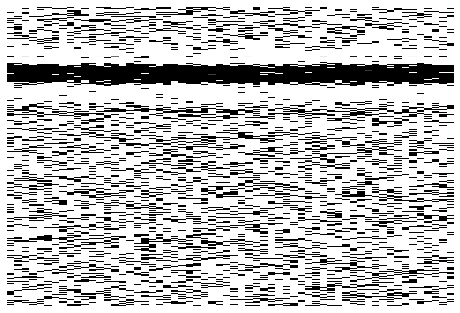

In [ ]:
plt.imshow(Y_pred_met_cy, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

In [ ]:
Y_pred = model.predict(X_test[1].reshape(1,1300,60))[0]
print(Y_pred.shape)

(1300, 60)


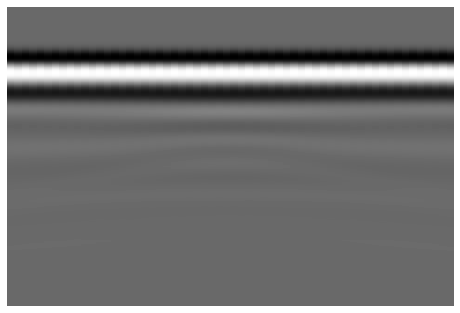

In [ ]:
plt.imshow(Y_pred, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

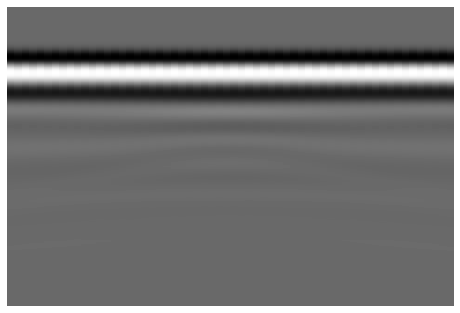

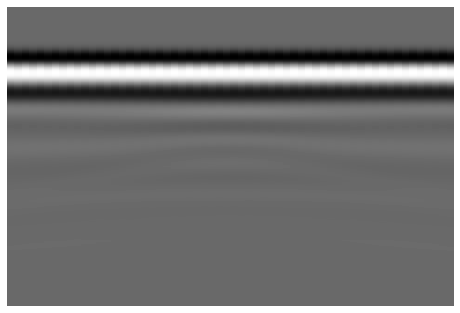

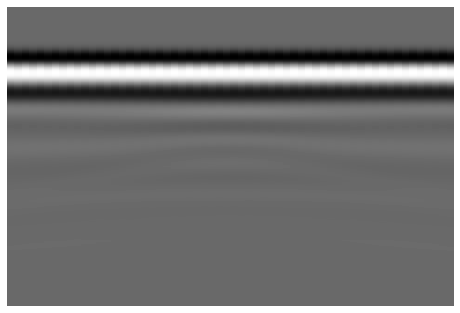

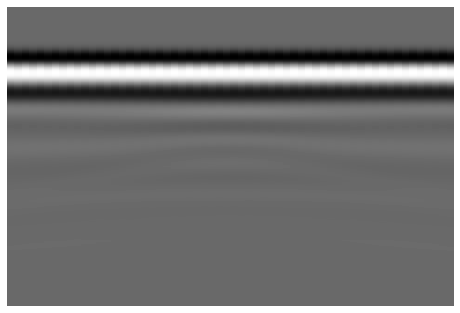

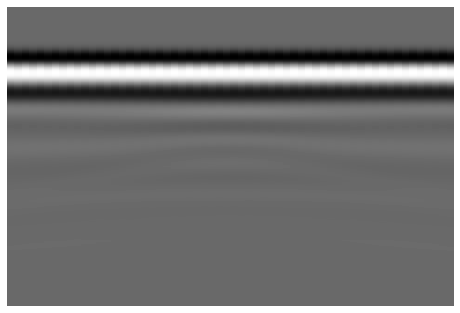

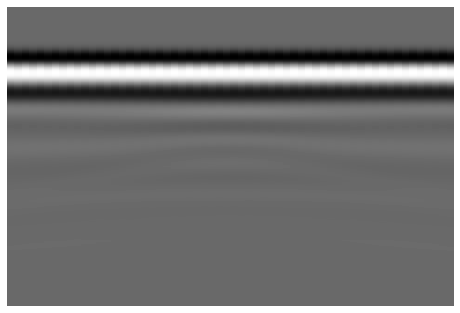

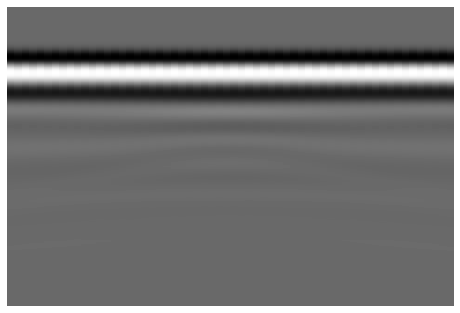

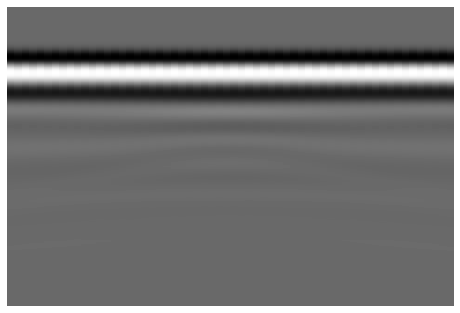

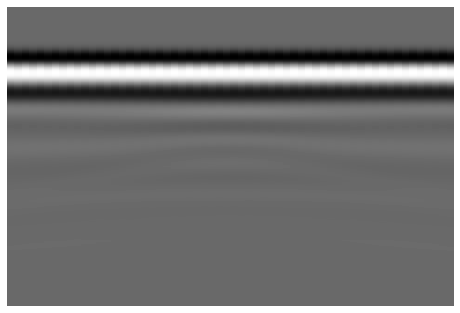

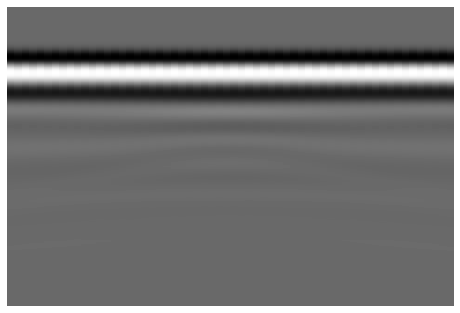

In [ ]:
for i in range(len(X_test)):
  Y_pred =  model.predict(X_test[i].reshape(1,1300,60))[0]
  plt.imshow(Y_pred, interpolation = "nearest", aspect = "auto", cmap = "gray")
  plt.style.use("seaborn")
  plt.axis("off")
  plt.show()

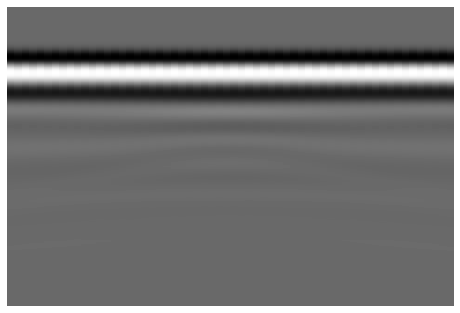

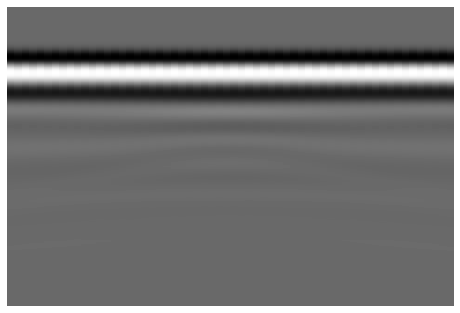

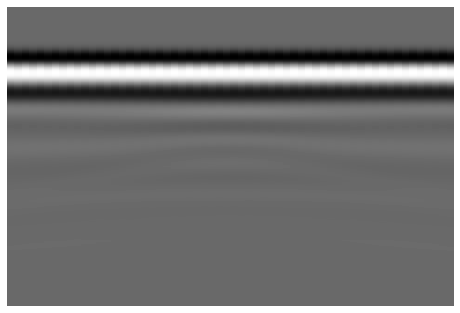

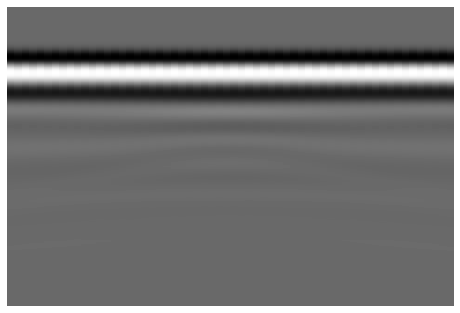

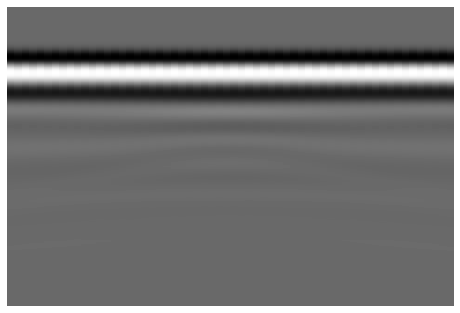

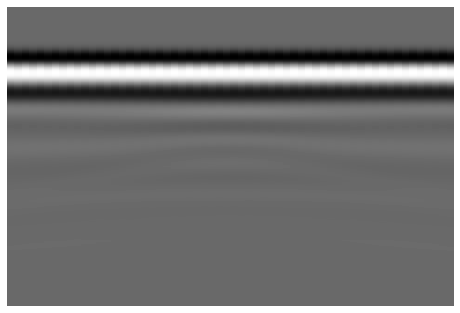

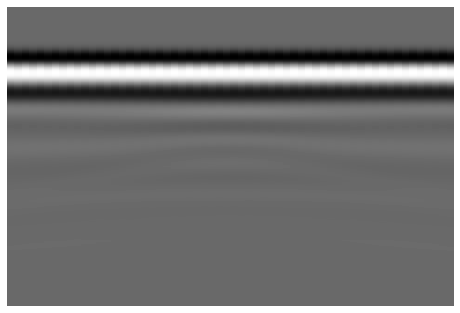

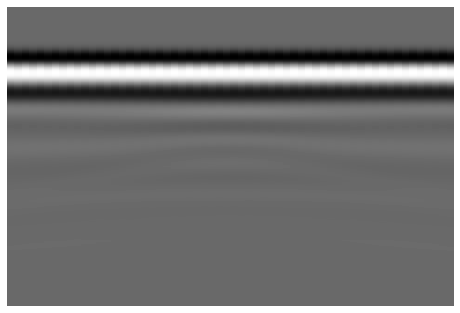

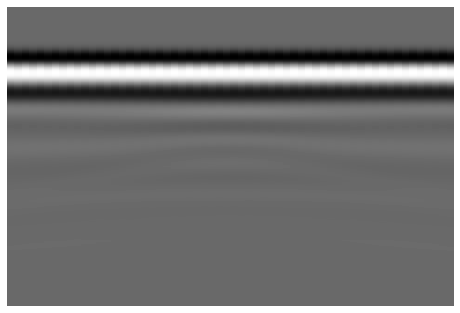

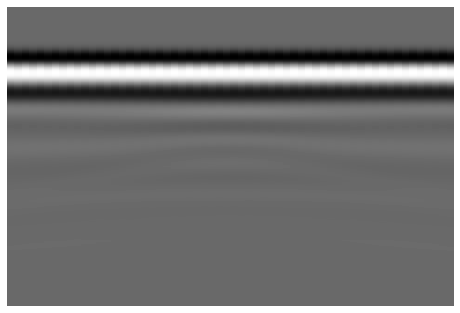

In [ ]:
for i in range(len(X_test)):
  Y_pred =  model.predict(X_test[i].reshape(1,1300,60))[0]
  plt.imshow(Y_pred, interpolation = "nearest", aspect = "auto", cmap = "gray")
  plt.style.use("seaborn")
  plt.axis("off")
  plt.show()

In [ ]:
for i in range(len(X_test)):
  Y_pred =  model.predict(X_test[i].reshape(1,1300,60))[0]
  # plt.imshow(Y_pred, interpolation = "nearest", aspect = "auto", cmap = "gray")
  # plt.style.use("seaborn")
  # plt.axis("off")
  # plt.show()
  print(Y_pred)

In [ ]:
print(Y_test)

In [ ]:
print(Y_train)

In [ ]:
print(Y[0])

In [ ]:
print(Y[1])

In [ ]:
print(Y[1] - Y[0])

In [ ]:
np.sum(Y[1] - Y[0])

0.20995456

In [ ]:
y = []
for i in range(151,201):
  filename = os.path.join( path,'Output_files','Varying depth','vmine'+str(i)+'_merged.out')
  rxnumber = 1
  rxcomponent = 'Ey'
  outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
  outputdata=outputdata.reshape(1300,60)
  y.append(outputdata)

In [ ]:
y = np.array(y)
Y = np.stack(y)
print(Y.shape)

(50, 1300, 60)


In [ ]:
np.sum(Y[10] - Y[0])

-3.0423489

In [ ]:
for i in range(len(Y)):
  # Y_pred =  model.predict(X_test[i].reshape(1,1300,60))[0]
  plt.imshow(Y[i], interpolation = "nearest", aspect = "auto", cmap = "gray")
  plt.style.use("seaborn")
  plt.axis("off")
  plt.show()

# Max Depth


(1300, 60)


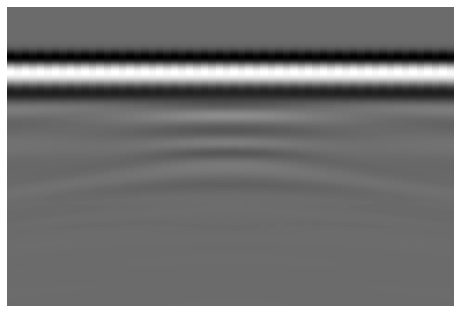

In [ ]:
#max_y

Y_max = Y[47]
print(Y_max.shape)
plt.imshow(Y_max, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

(1300, 60)


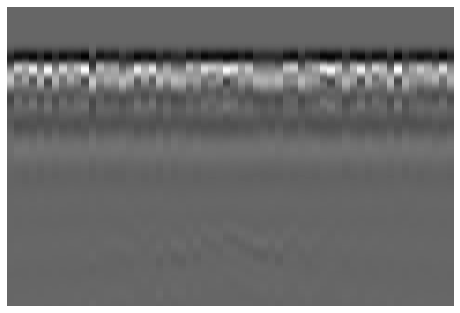

In [ ]:
#max_x

filename = os.path.join( path, 'Output_files','mine','mine197_merged.out')
rxnumber = 1
rxcomponent = 'Ey'
outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)


X_max = outputdata
print(X_max.shape)


plt.imshow(X_max, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

(1, 1300, 60)


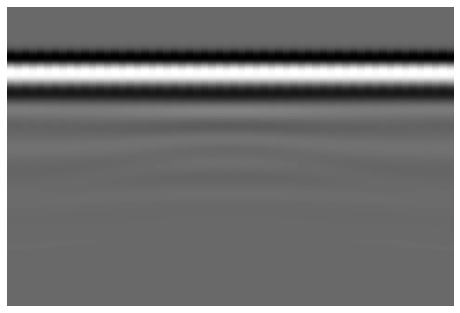

In [ ]:
X_max = X[47]
Y_pred_max = model.predict(X_max.reshape(1,1300,60))
print(Y_pred_max.shape)

plt.imshow(Y_pred_max.reshape(1300,60), interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

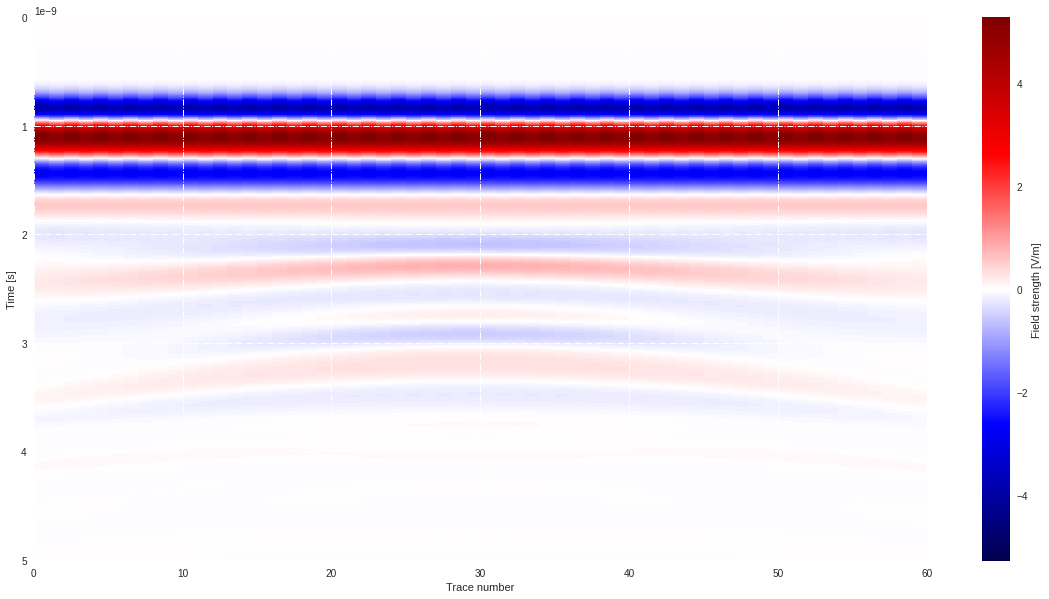

In [ ]:
filename = os.path.join( path,'Output_files','Varying depth','vmine197_merged.out')
rxnumber = 1
rxcomponent = 'Ey'
outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
outputdata=outputdata.reshape(1300,60)
#arrays.append(outputdata)
   
#print(outputdata.shape)
plt = mpl_plot(filename,outputdata, dt, rxnumber, rxcomponent)

# Min Depth

(1300, 60)


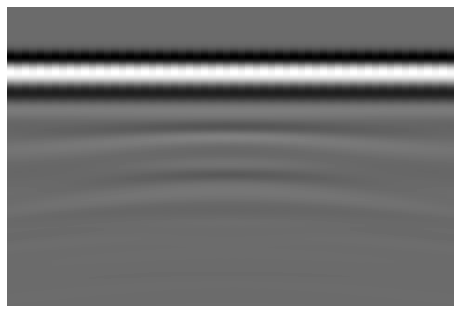

In [ ]:
Y_min = Y[39]
print(Y_min.shape)
plt.imshow(Y_min, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

(1300, 60)


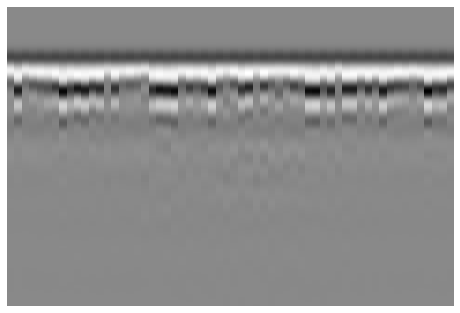

In [ ]:
filename = os.path.join( path, 'Output_files','mine','mine189_merged.out')
rxnumber = 1
rxcomponent = 'Ey'
outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)


X_min = outputdata
print(X_min.shape)


plt.imshow(X_min, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

(1, 1300, 60)


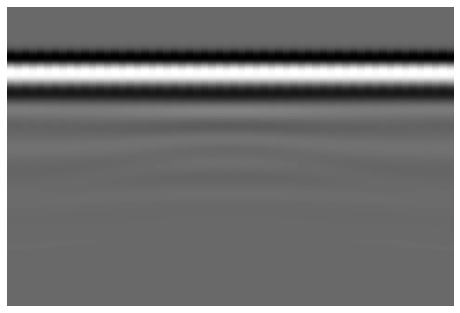

In [ ]:
X_min = X[39]
Y_pred_min = model.predict(X_min.reshape(1,1300,60))
print(Y_pred_min.shape)

plt.imshow(Y_pred_min.reshape(1300,60), interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

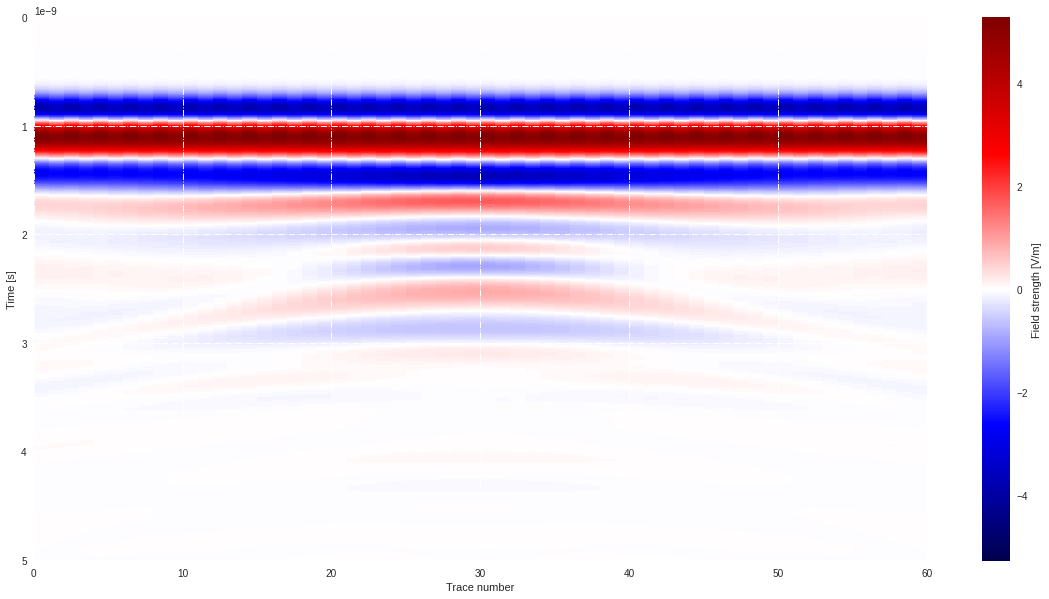

In [ ]:
filename = os.path.join( path,'Output_files','Varying depth','vmine189_merged.out')
rxnumber = 1
rxcomponent = 'Ey'
outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
outputdata=outputdata.reshape(1300,60)
#arrays.append(outputdata)
   
#print(outputdata.shape)
plt = mpl_plot(filename,outputdata, dt, rxnumber, rxcomponent)

# Avg Depth

(1300, 60)


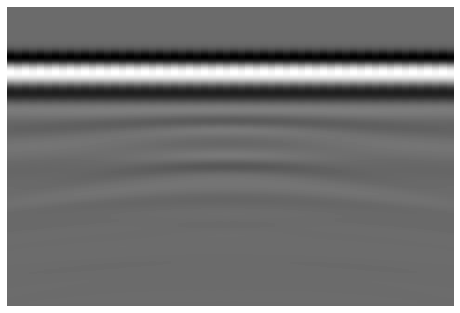

In [ ]:
Y_avg = Y[3]
print(Y_avg.shape)
plt.imshow(Y_avg, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

(1300, 60)


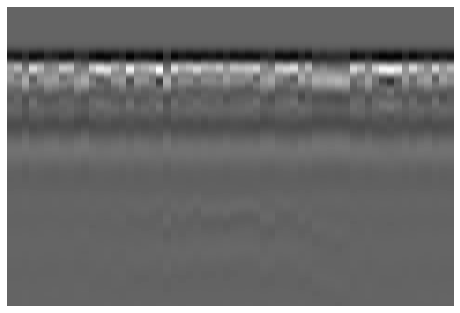

In [ ]:
filename = os.path.join( path, 'Output_files','mine','mine153_merged.out')
rxnumber = 1
rxcomponent = 'Ey'
outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)

X_avg = outputdata
print(X_avg.shape)


plt.imshow(X_avg, interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

(1, 1300, 60)


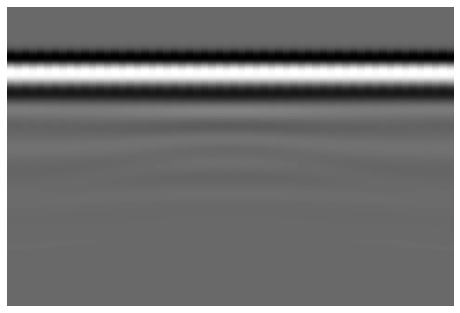

In [ ]:
X_avg = X[3]
Y_pred_avg = model.predict(X_avg.reshape(1,1300,60))
print(Y_pred_avg.shape)

plt.imshow(Y_pred_avg.reshape(1300,60), interpolation = "nearest", aspect = "auto", cmap = "gray")
plt.style.use("seaborn")
plt.axis("off")
plt.show()

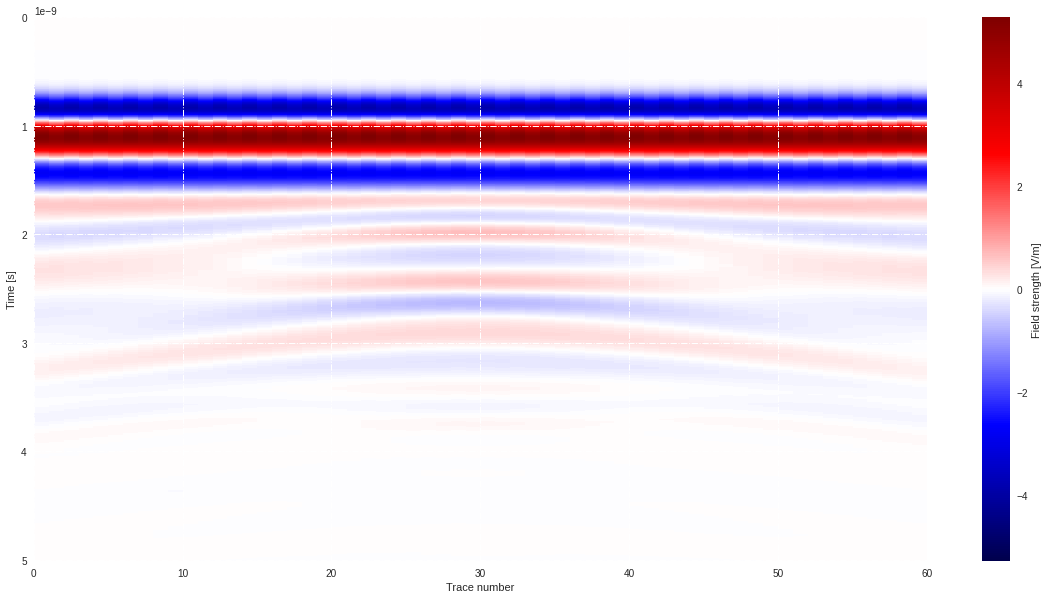

In [ ]:
filename = os.path.join( path,'Output_files','Varying depth','vmine153_merged.out')
rxnumber = 1
rxcomponent = 'Ey'
outputdata, dt = get_output_data(filename, rxnumber, rxcomponent)
outputdata=outputdata.reshape(1300,60)
#arrays.append(outputdata)
   
#print(outputdata.shape)
plt = mpl_plot(filename,outputdata, dt, rxnumber, rxcomponent)